In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
#Δεδομένα σεισμού Αρκαλοχώρι
H = 8 #km - εστιακό βάθος
t_p = [ 5.28 , 8.22 , 8.8 , 13.63 , 13.81 , 13.13 ] #χρόνος άφιξης p κυμάτων σε 5 διαφορετικο΄ύς σταθμούς
t_s = [ 9.88 , 14.93 , 15.69 , 23.39 , 23.98 , 24.35 ] #χρόνος άφιξης p κυμάτων σε 5 διαφορετικο΄ύς σταθμούς

In [47]:
#Υπολογισμός Δt_sp 
N = len(t_p)
Δt_sp = []

for i in range (N):
    dt =t_s[i] - t_p[i]
    dt = round(dt,2)
    Δt_sp.append(dt)
    
print('Η χρονική διαφορά άφιξης των s και p κυμάτων είναι:',Δt_sp,'σε κάθε σταθμό αντίστοιχα.')

Η χρονική διαφορά άφιξης των s και p κυμάτων είναι: [4.6, 6.71, 6.89, 9.76, 10.17, 11.22] σε κάθε σταθμό αντίστοιχα.


In [48]:
#Μέθοδος ελαχίστων τετραγώνων
mean_t_p = np.mean(t_p)
mean_Δt_sp = np.mean(Δt_sp)
sum1 = 0
sum2 = 0
for i in range(N):
    sum1 += (t_p[i] - mean_t_p) * (Δt_sp[i] - mean_Δt_sp)
    sum2 += (t_p[i] - mean_t_p) ** 2
m = sum1 / sum2
m = round(m,3)
c = mean_Δt_sp - (m * mean_t_p)
c = round(c,3)
 
print('Η ευθεία ελαχίστων τετραγώνων έχει την μορφή: y=',m,'x +',c, '.')

Η ευθεία ελαχίστων τετραγώνων έχει την μορφή: y= 0.695 x + 0.943 .


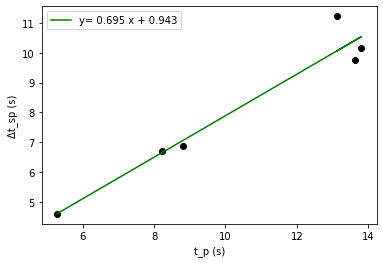

In [59]:
#Γραφική παράσταση
x = np.array(t_p)
y = m*x + c
plt.plot(x, y, color='green', label='y= 0.695 x + 0.943')
plt.scatter(t_p, Δt_sp, c='black') 
plt.xlabel('t_p (s)')
plt.ylabel('Δt_sp (s)')
plt.legend()
plt.savefig('wadati.png')

In [60]:
#Υπολογισμούς λόγου ταχυτήτων p και s κυμάτων
up_us = round(1 + m,3)
up_us_theory = np.sqrt(3)
apoklish = round(((up_us_theory - up_us)/up_us_theory)*100,3)
print('Ο λόγος των ταχυτήτων των p και s κυμάτων είναι: up/us =',up_us,'. Η απόκλιση από την θεωρητικά αναμενόμενη τιμή είναι:',apoklish,'%.')

Ο λόγος των ταχυτήτων των p και s κυμάτων είναι: up/us = 1.695 . Η απόκλιση από την θεωρητικά αναμενόμενη τιμή είναι: 2.139 %.


In [64]:
#Σταθερά Poisson
us = 3.5 #km/s
up = up_us*us
ν = (up**2 - 2*(us**2))/(2*(up**2 - us**2))
ν_theory = 0.23
apoklish1= round(((ν_theory - ν)/ν_theory)*100,3)
print('Η σταθερά Poisson έχει τιμή ν =',round(ν,3),'. Η απόκλιση από την θεωρητικά αναμενόμενη τιμή είναι:',apoklish1,'%.')

Η σταθερά Poisson έχει τιμή ν = 0.233 . Η απόκλιση από την θεωρητικά αναμενόμενη τιμή είναι: -1.327 %.


In [55]:
#Υπολογισμός t_0
t_0 = -c/m
t_0

-1.3568345323741007

In [63]:
#Παράμετροι Lame
ρ = 3111 #kg/m^3 πυκνότητα upper mantle Γης
μ = ρ*(us*1000)**2
λ = ρ*(up*1000)**2 - 2*μ
print('Οι παράμετροι Lame είναι μ=',μ,'N/m^2 και λ=',λ,'N/m^2.')

Οι παράμετροι Lame είναι μ= 38109750000.0 N/m^2 και λ= 33270764493.75 N/m^2.


In [68]:
#Απόσταση σταθμών από επίκεντρο σεισμού
R = [] #km
for i in range(N):
    r = (up*us*Δt_sp[i])/(up-us)
    r = round(r,2)
    R.append(r)
print('Η απόσταση κάθε σταθμού από τον σεισμό είναι:',R, 'σε km.')

A= []
R_th = [ 26.7 , 44.8 , 47.6 , 73.9 , 75.4 , 77.9 ]
for i in range(N):
    a = abs(round(((R_th[i] - R[i])/R_th[i])*100,3))
    A.append(a)
print('Η απόκλιση κάθε απόστασης που υπολογίσαμε από τα επίσημα δεδομένα είναι:',A, '%.')

Η απόσταση κάθε σταθμού από τον σεισμό είναι: [39.27, 57.28, 58.81, 83.31, 86.81, 95.77] σε km.
Η απόκλιση κάθε απόστασης που υπολογίσαμε από τα επίσημα δεδομένα είναι: [47.079, 27.857, 23.55, 12.733, 15.133, 22.94] %.
